![](header.jpg)

# Mom's Apriltags

---

This is a library primarily designed to build camera calibration boards. However, you can access the individual apriltags if you want.

In [1]:
# reload library
%load_ext autoreload
%autoreload 2

## Get Individual Tag

In [21]:
from moms_apriltag import TagGenerator2, TagGenerator3
from moms_apriltag import apriltags_v2, apriltags_v3
import numpy as np
from matplotlib import pyplot as plt
from collections import namedtuple

In [7]:
imgs = []
for family in apriltags_v2:
    tg = TagGenerator2(family)
    im = tg.generate(0)
    imgs.append(im)
    
print(f"Created {len(imgs)} tags")

Created 4 tags


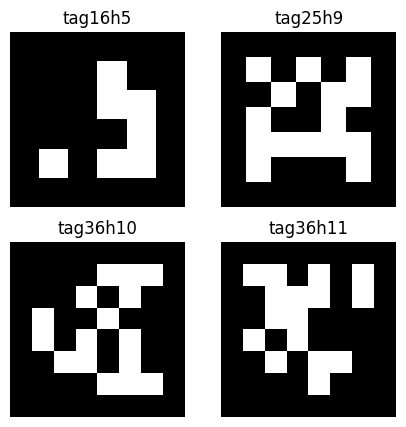

In [8]:
plt.figure(figsize=(5,5))
for i, (im,family) in enumerate(zip(imgs, apriltags_v2)):
    plt.subplot(2,2,i+1)
    plt.imshow(im, cmap="gray")
    plt.title(family)
    plt.axis("off");

In [10]:
imgs = []
for family in apriltags_v3:
    tg = TagGenerator3(family)
    im = tg.generate(0)
    imgs.append(im)
    
print(f"Created {len(imgs)} tags")

Created 5 tags


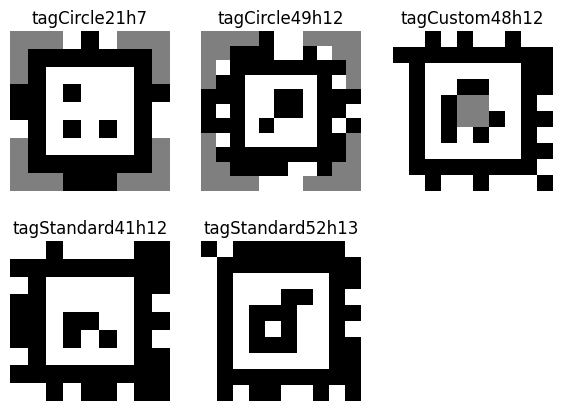

In [13]:
plt.figure(figsize=(7,5))
for i, (im,family) in enumerate(zip(imgs, apriltags_v3)):
    plt.subplot(2,3,i+1)
    plt.imshow(im, cmap="gray")
    plt.title(family)
    plt.axis("off");

## Circle Tags

Circle tags have a transparent layer that is drawn as gray (127) in the grayscale image (see above). However, when you are going to save the image, you need to make that value transparent and save it to a `png` image.

In [60]:
from PIL import Image

tg = TagGenerator3("tagCircle21h7")
im = tg.generate(0,30)
np_png = tg.toRGBA(im)

png = Image.fromarray(np.uint8(np_png), "RGBA")
png.save("rgba-pil.png")

In [47]:
import cv2

cv2.imwrite("rgba-ocv.png", np_png)

True

## Make Board

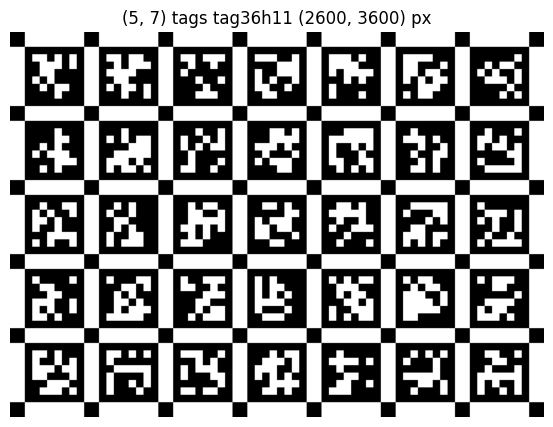

In [68]:
import moms_apriltag as apt

family = "tag36h11"
shape = (5,7)
size = 50

tgt = apt.board(shape, family, size)

plt.figure(figsize=(15,5))
plt.imshow(tgt, cmap="gray")
plt.title(f"{shape} tags {family} {tgt.shape} px")
plt.axis("off");

## Scaling Images

When scaling images, you want to keep nice sharp edges between black and white so software can read the tag properly. Here, I just a simple `numpy` function to scale the array up.

Original size: (8, 8)
Scaled size: (64, 64)


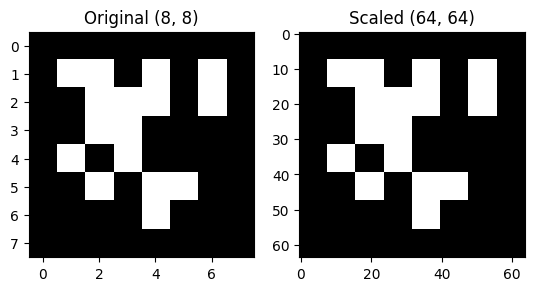

In [66]:
tg = TagGenerator2("tag36h11")
im = tg.generate(0)
print(f"Original size: {im.shape}")

scale = 8
ims = np.repeat(np.repeat(im, scale, axis=0), scale, axis=1)
print(f"Scaled size: {ims.shape}")

plt.subplot(121)
plt.imshow(im, cmap="gray")
plt.title(f"Original {im.shape}")
plt.subplot(122)
plt.imshow(ims, cmap="gray")
plt.title(f"Scaled {ims.shape}");

## Fun Tags

There are some tags that make funny pictures.

In [29]:
Tag = namedtuple("Tag","fam id img")
imgs = []

for i in [399,319,214,177,325]:
    tg = TagGenerator2("tag36h11")
    im = tg.generate(i)
    t = Tag("tag36h11",i,im)
    imgs.append(t)
    
for i in [6,29]:
    tg = TagGenerator2("tag25h9")
    im = tg.generate(i)
    t = Tag("tag25h9",i,im)
    imgs.append(t)
    
for i in [1,5,100,113,137,141,146,283]:
    tg = TagGenerator3("tagStandard41h12")
    im = tg.generate(i)
    t = Tag("tagStandard41h12",i,im)
    imgs.append(t)
    
for i in [129,447,441]:
    tg = TagGenerator3("tagStandard52h13")
    im = tg.generate(i)
    t = Tag("tagStandard52h13",i,im)
    imgs.append(t)

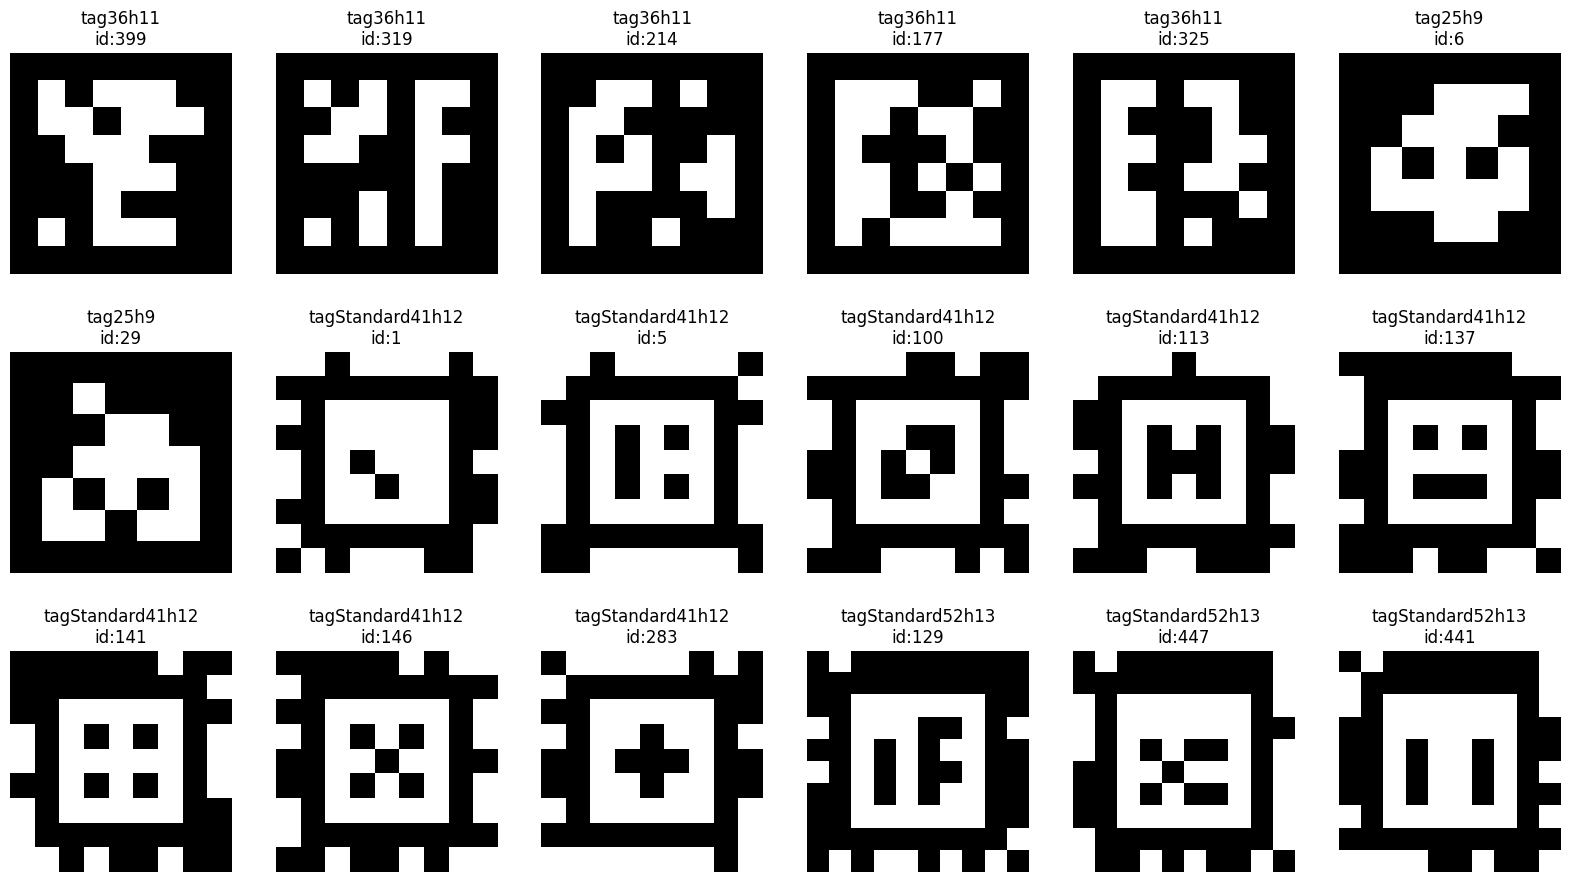

In [32]:
plt.figure(figsize=(20,11))
for i, t in enumerate(imgs):
    i += 1
    plt.subplot(3,6,i)
    plt.imshow(t.img, cmap="gray")
    plt.title(f"{t.fam}\nid:{t.id}")
    plt.axis("off");